# Predict Future Sales Price of Bulldozer

## 1. Problem Statement

>The goal of the project is to predict the sale price of bulldozer at auction based on it's usage and configuaration.

## 2. Data

The data is downloaded from Kaggle BlueBook for Bulldozers contest.

The data is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more details check : https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Faetures 
Check data dictionary provided by kaggle in project's data folder



In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn


In [2]:
train_data = pd.read_csv("data/TrainandValid.csv", low_memory=False, parse_dates=["saledate"])

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
train_data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [5]:
train_data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
train_data["saledate"] = pd.to_datetime(train_data["saledate"])
train_data["saledate"].dtype

dtype('<M8[ns]')

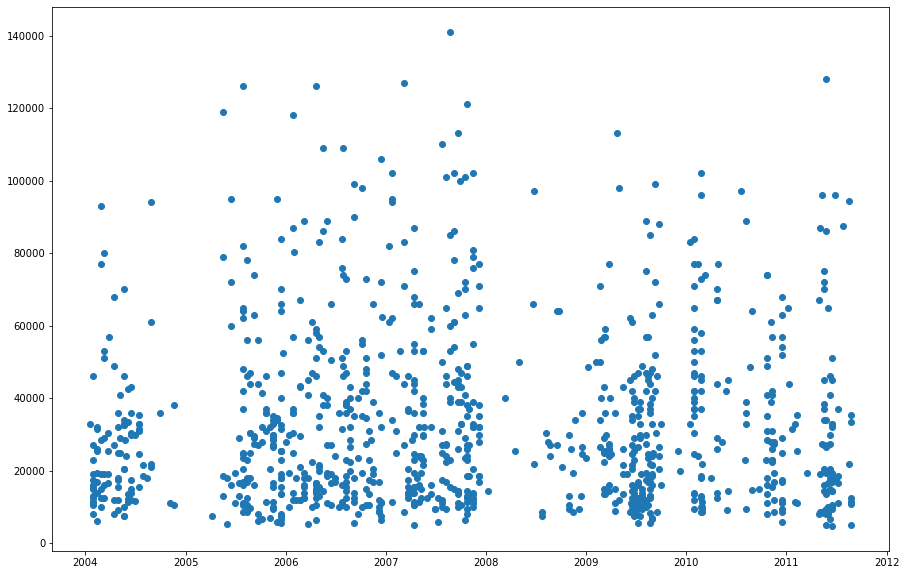

In [8]:
fig , ax = plt.subplots(figsize=(15,10))
ax.scatter(train_data["saledate"][:1000] , train_data["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

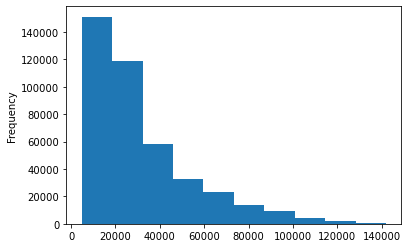

In [9]:
train_data["SalePrice"].plot.hist()

<BarContainer object of 1000 artists>

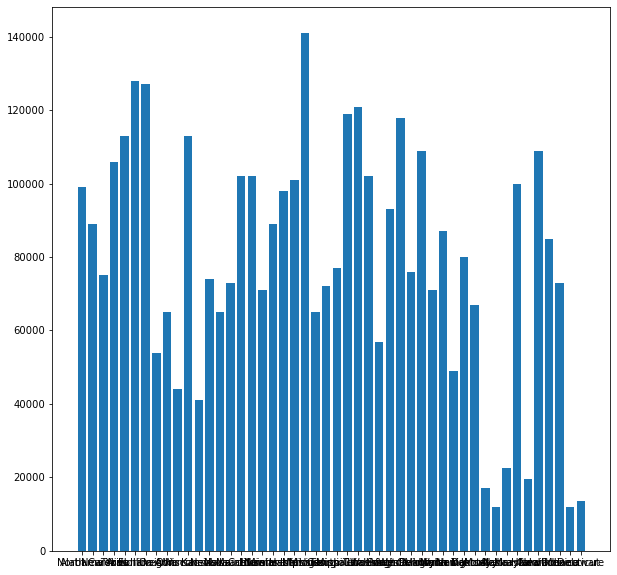

In [10]:
fig , ax = plt.subplots(figsize = (10,10))
ax.bar(train_data["state"][:1000] , train_data["SalePrice"][:1000])

In [11]:
train_data.groupby("state")["SalePrice"].max().sort_values(ascending = False)

state
Florida           142000.0
Kentucky          142000.0
North Dakota      142000.0
South Dakota      141000.0
Louisiana         141000.0
Mississippi       141000.0
Missouri          141000.0
Michigan          141000.0
Texas             141000.0
Utah              141000.0
Arkansas          141000.0
Tennessee         140000.0
Maryland          140000.0
Oklahoma          140000.0
New Mexico        140000.0
Nevada            140000.0
Unspecified       140000.0
Washington        140000.0
Alabama           140000.0
Wyoming           140000.0
Arizona           140000.0
California        140000.0
Iowa              140000.0
Colorado          140000.0
Georgia           140000.0
Illinois          140000.0
South Carolina    139000.0
Indiana           137000.0
Pennsylvania      137000.0
Idaho             137000.0
Oregon            135000.0
North Carolina    135000.0
Nebraska          135000.0
New Jersey        135000.0
Minnesota         132500.0
Connecticut       132000.0
Virginia          1315

# Sorting Data according to dates 

In [7]:

train_data.sort_values(by = ["saledate"] , inplace = True)



In [8]:
df_temp = train_data.copy()  #making copy of our original data

In [9]:
df_temp.set_index("saledate").head().T

saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [10]:

df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayofYear"] = df_temp.saledate.dt.dayofyear
      
df_temp.drop("saledate" , axis = 1, inplace = True)        

In [11]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [11]:
train_data.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

# Converting strings to categories

In [12]:


##checking which columns have values string
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
   

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [13]:
for label , content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [15]:
## strings have been converted to categories,in dataframe they might still seems to be strings but underhood panads function (we performed up) has provided a numeric values.
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [16]:
# Checking % of missing data in each column

df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [17]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

# Fill Missing Values


In [18]:
# Finding which columns have missing numeric data

for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


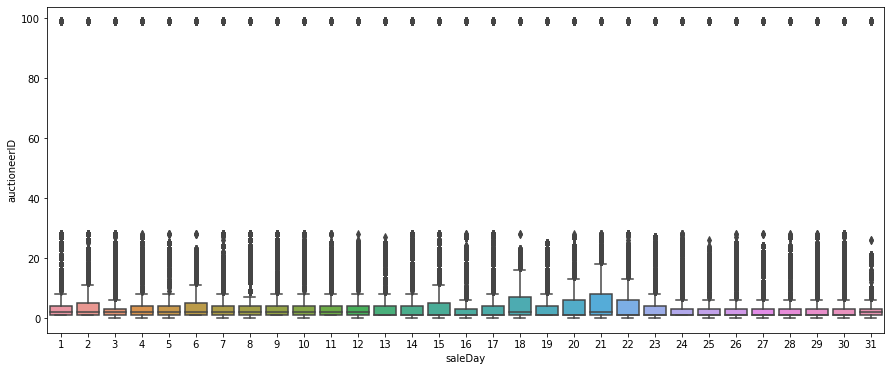

In [38]:
fig , ax = plt.subplots(figsize = (15,6))
ax = sns.boxplot(data = df_temp , x = "saleDay" , y = "auctioneerID")

In [39]:
df_temp.corr()["MachineHoursCurrentMeter"]

SalesID                     0.007377
SalePrice                   0.015660
MachineID                  -0.001149
ModelID                    -0.006736
datasource                  0.009747
auctioneerID                0.030911
YearMade                   -0.011598
MachineHoursCurrentMeter    1.000000
saleYear                    0.028243
saleMonth                  -0.027272
saleDay                    -0.002772
saleDayOfWeek               0.031842
saleDayofYear              -0.028105
Name: MachineHoursCurrentMeter, dtype: float64

<AxesSubplot:xlabel='saleDayOfWeek', ylabel='MachineHoursCurrentMeter'>

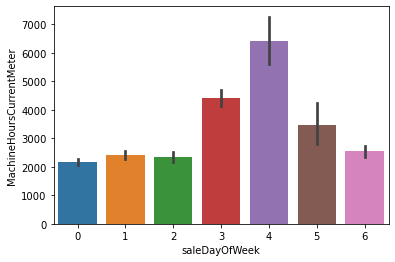

In [87]:
sns.barplot(data = df_temp , x = "saleDayOfWeek" , y = "MachineHoursCurrentMeter")

In [19]:
df_temp["auctioneerID"].fillna(df_temp["auctioneerID"].median() , inplace = True)

In [20]:
df_temp["MachineHoursCurrentMeter"].fillna(df_temp["MachineHoursCurrentMeter"].median(), inplace = True)

In [21]:
for label , content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [22]:
## filling missing categorical data

for label , content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_temp[label] = pd.Categorical(content).codes

In [25]:
# df_temp.isna().sum()
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              412698 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  412698 non-null  float64 
 8   UsageBand                 412698 non-null  int8    
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           412698 non-null  int16   
 12  fiModelSeries             412698 non-null  int8    
 13  fiModelDescriptor       

In [23]:
df_temp["fiModelDesc"] = pd.Categorical(df_temp["fiModelDesc"]).codes
df_temp["fiBaseModel"] = pd.Categorical(df_temp["fiBaseModel"]).codes
df_temp["fiProductClassDesc" ] = pd.Categorical(df_temp["fiProductClassDesc" ]).codes
df_temp["state"] = pd.Categorical(df_temp["state"]).codes
df_temp["ProductGroup"] = pd.Categorical(df_temp["ProductGroup"]).codes
df_temp["ProductGroupDesc"] = pd.Categorical(df_temp["ProductGroupDesc"]).codes


In [24]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   fiModelDesc               412698 non-null  int16  
 10  fiBaseModel               412698 non-null  int16  
 11  fiSecondaryDesc           412698 non-null  int16  
 12  fiModelSeries             412698 non-null  int8   
 13  fiModelDescriptor         412698 non-nu

# Splitting Data

In [54]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [25]:
df_train = df_temp[df_temp.saleYear != 2012]
df_valid = df_temp[df_temp.saleYear == 2012]

In [26]:
X_train , y_train = df_train.drop("SalePrice" , axis =1) , df_train["SalePrice"]
X_valid , y_valid = df_valid.drop("SalePrice" , axis =1) , df_valid["SalePrice"]

## Modeling

In [57]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1 , random_state=42)

model.fit(X_train, y_train)

Wall time: 6min 23s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
model.score(X_valid , y_valid)

0.8716633198604213

In [27]:
## Building RMSLE evaluation function

from sklearn.metrics import mean_squared_log_error , mean_absolute_error , r2_score

def rmsle(y_true , y_preds):
    
    return np.sqrt(mean_squared_log_error(y_true , y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {
        "Train MAE" : mean_absolute_error(y_train , train_preds),
        "Valid MAE" : mean_absolute_error(y_valid , valid_preds),
        "Train RMSLE" : rmsle(y_train , train_preds),
        "Valid RMSLE" : rmsle(y_valid , valid_preds),
        "Train r2_score" : r2_score(y_train , train_preds),
        "Valid r2_socre" : r2_score(y_valid , valid_preds)
    }
    return scores



In [30]:
## Reducing our data to speed up model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1 , random_state = 42 , max_samples=10000)

In [31]:
%%time

model.fit(X_train , y_train)

Wall time: 13.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [56]:
show_scores(model)

{'Train MAE': 5549.672235786849,
 'Valid MAE': 7164.845172383996,
 'Train RMSLE': 0.25733014548976096,
 'Valid RMSLE': 0.2934878473855949,
 'Train r2_score': 0.8609876432508536,
 'Valid r2_socre': 0.8321929599687525}

In [32]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    "n_estimators" : np.arange(10,100 , 10),
    "max_depth" : [None , 3, 5 ,10 ,30],
    "min_samples_split" : np.arange(2,20 ,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : [0.5 , 1, "sqrt" , "auto"],
    "max_samples" : [10000 , None]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=42 , n_jobs=-1), 
                              rf_grid , 
                              n_iter = 5 , 
                              cv= 5 ,
                              verbose = True )

rs_model.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 3min 4s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10, 30],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000, None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [40]:
model = RandomForestRegressor(n_jobs = -1 , n_estimators= 20,random_state=42,
                                 min_samples_split= 14,
                                 min_samples_leaf= 5,
                                 max_samples= None,
                                 max_features= 'sqrt',
                                 max_depth= None)

In [41]:
model.fit(X_train , y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=14, n_estimators=20, n_jobs=-1,
                      random_state=42)

In [42]:
show_scores(model)

{'Train MAE': 4561.9740857841825,
 'Valid MAE': 6687.269788351736,
 'Train RMSLE': 0.21259758543104837,
 'Valid RMSLE': 0.2730138971774728,
 'Train r2_score': 0.9059290293431589,
 'Valid r2_socre': 0.8530984581322562}

## Some hit and trials 

In [51]:
%%time
model = RandomForestRegressor(n_jobs = -1 , n_estimators= 40,random_state=42,
                                 min_samples_split= 14,
                                 min_samples_leaf= 3,
                                 max_samples= None,
                                 max_features= 'sqrt',
                                 max_depth= None)
model.fit(X_train , y_train)

Wall time: 26.6 s


RandomForestRegressor(max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=14, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [52]:
show_scores(model)

{'Train MAE': 4235.675906116971,
 'Valid MAE': 6561.894378547211,
 'Train RMSLE': 0.1990469750268126,
 'Valid RMSLE': 0.26882344104101086,
 'Train r2_score': 0.9183479410457774,
 'Valid r2_socre': 0.8591899808928917}

In [57]:
%%time
model = RandomForestRegressor(n_jobs = -1 , n_estimators= 40,random_state=42,
                                 min_samples_split= 14,
                                 min_samples_leaf= 2,
                                 max_samples= None,
                                 max_features= "auto",
                                 max_depth= None)
model.fit(X_train , y_train)


Wall time: 2min 38s


RandomForestRegressor(min_samples_leaf=2, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [58]:
show_scores(model)

{'Train MAE': 2922.3497118751793,
 'Valid MAE': 6090.667838383221,
 'Train RMSLE': 0.14538871193752143,
 'Valid RMSLE': 0.25233942031364126,
 'Train r2_score': 0.9573524425482135,
 'Valid r2_socre': 0.8729266973573018}

In [31]:
%%time
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_jobs = -1 , n_estimators= 40,random_state=42,
                                 min_samples_split= 14,
                                 min_samples_leaf= 1,
                                 max_samples= None,
                                 max_features= 0.5,
                                 max_depth= None)
ideal_model.fit(X_train , y_train)
show_scores(ideal_model)

Wall time: 1min 30s


{'Train MAE': 2942.340651078156,
 'Valid MAE': 5963.47989565748,
 'Train RMSLE': 0.14415360816981193,
 'Valid RMSLE': 0.24694437453455997,
 'Train r2_score': 0.9591796499547254,
 'Valid r2_socre': 0.8813934466550004}

## Here with a score of 0.247 we are in top 50 according to leaderborad https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard 

# Data Preprocessing for test set

In [58]:
def preprocess_data(df):
    ## converting date column to pandas time date series
#     df.sort_values(by = ["saledate"] , inplace = True)
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear
    df.drop("saledate" , axis = 1, inplace = True)    
    
    ## converting strings to category
    for label , content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

    ## fill missing numeric data
    df["auctioneerID"].fillna(df["auctioneerID"].median() , inplace = True)        
    df["MachineHoursCurrentMeter"].fillna(df["MachineHoursCurrentMeter"].median(), inplace = True) 

    ## filling missing categorical data and converting category to int
    for label , content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = pd.Categorical(content).codes

    df["fiModelDesc"] = pd.Categorical(df["fiModelDesc"]).codes
    df["fiBaseModel"] = pd.Categorical(df["fiBaseModel"]).codes
    df["fiProductClassDesc" ] = pd.Categorical(df["fiProductClassDesc" ]).codes
    df["state"] = pd.Categorical(df["state"]).codes
    df["ProductGroup"] = pd.Categorical(df["ProductGroup"]).codes
    df["ProductGroupDesc"] = pd.Categorical(df["ProductGroupDesc"]).codes 

In [59]:
test_df = pd.read_csv("data/Test.csv" , low_memory = False , parse_dates = ["saledate"])

In [60]:
test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,2012-10-24,80NX3,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,2012-10-24,28N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,2012-10-24,35N,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [61]:
preprocess_data(test_df)

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   fiModelDesc               12457 non-null  int16  
 9   fiBaseModel               12457 non-null  int16  
 10  fiSecondaryDesc           12457 non-null  int8   
 11  fiModelSeries             12457 non-null  int8   
 12  fiModelDescriptor         12457 non-null  int8   
 13  ProductSize               12457 non-null  int8   
 14  fiProd

In [63]:
test_df.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [64]:
test_preds = ideal_model.predict(test_df)

In [65]:
test_preds

array([17152.21872607, 19373.40178018, 48291.39730439, ...,
       14135.97083881, 16879.80666014, 27564.87570226])

In [66]:
submission_df = pd.DataFrame()


In [67]:
submission_df["SalesId"] = test_df["SalesID"]
submission_df["SalesPrice"] = test_preds

In [69]:
submission_df

,SalesId,SalesPrice
0,1227829,17152.218726
1,1227844,19373.401780
2,1227847,48291.397304
3,1227848,67254.362942
4,1227863,55602.210485
...,...,...
12452,6643171,39339.691286
12453,6643173,12108.524162
12454,6643184,14135.970839
12455,6643186,16879.806660
